In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
precep_all=engine.execute(
    '''SELECT date, prcp
    FROM Measurement
    ORDER BY date DESC;''')
precepall=precep_all.fetchall()

In [10]:
last_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_twelve_months

datetime.date(2016, 8, 23)

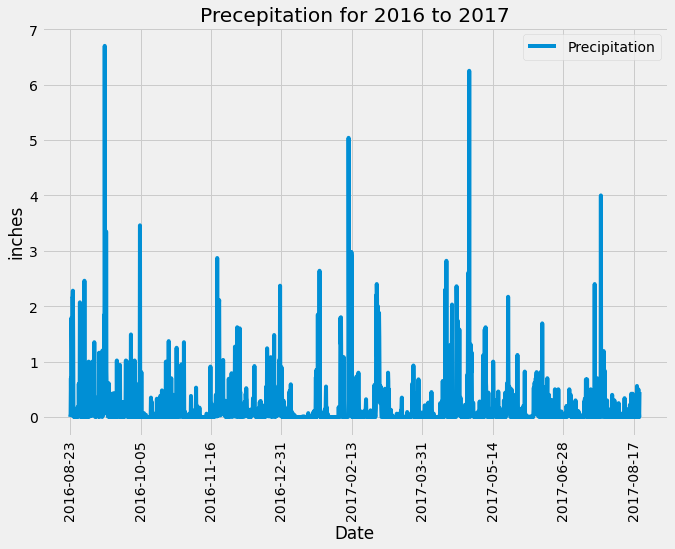

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

precep = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= last_twelve_months).all()
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
date_precep_df =pd.DataFrame(precep, columns=["date","prcp"])
date_precep_df=date_precep_df.dropna(how="any")


# Sort the dataframe by date
date_precep_df=date_precep_df.sort_values(["date"], ascending=True)
date_precep_df=date_precep_df.set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
date_precep_df.plot(rot=90, figsize=(10,7))
plt.title("Precepitation for 2016 to 2017")
plt.ylabel("inches")
plt.xlabel("Date")
# plt.grid(True)
plt.legend(["Precipitation"],loc="best")
plt.show()



In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precep_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [73]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_summary = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
temp_summary

[(54.0, 85.0, 71.66378066378067)]

In [79]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_temp=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= last_twelve_months).filter(Measurement.station == "USC00519281").\
     order_by(Measurement.date).all()

date_temp_df = pd.DataFrame(date_temp, columns=['Date','tobs'])
date_temp_df=date_temp_df.dropna(how='all', axis=0)
date_temp_df.head()


,Date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


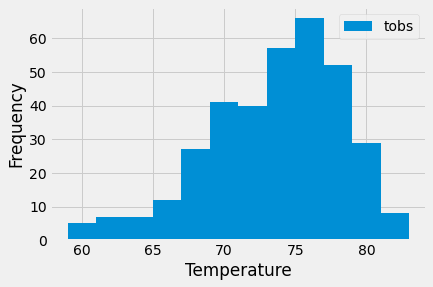

In [95]:
#HISTOGRAM
plt.hist(date_temp_df['tobs'],12) 
#plot.xlabel('')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(["tobs"],loc="best")
plt.show()

# Close session

In [96]:
# Close Session
session.close()